In [1]:
import pyslise as ps

In [132]:
n = 2

def Vpt(x, n, a):
    return -n/cosh(a*x)^2

def f(x):
    v0 = Vpt(x, 45., 1.)
    v1 = Vpt(x, 39./2, 1./2)
    return matrix(RDF, [[v0+v1, v0-v1], [v0-v1,v0+v1]])
    

scs = ps.Pyscs(f, n, 0, 30, 256)

In [79]:
def error(E):
    (yl, dyl),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 0,.6)
    (yr, dyr),_ = scs.propagate(E, (matrix.zero(2), matrix.identity(2)), 30,.6)
    return matrix(RDF, dyl*yl^-1 - dyr*yr^-1).det()
    

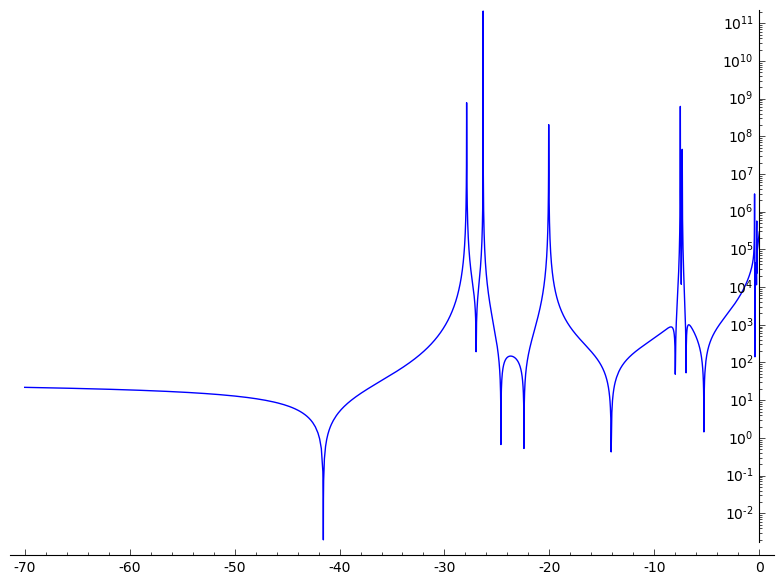

In [80]:
plot_semilogy(lambda E: abs(error(E)), (-70,0))

In [63]:
find_root(error, -40,-33.8)

-33.889167788944604

In [133]:
E = -33.889167788944604
x= 3
def prop(x, start=0, start_Y=matrix.zero(2), start_dY=matrix.identity(2)):
    (y, _), _ = scs.propagate(E, (start_Y, start_dY), start,x)
    return matrix(y).det()


In [134]:
plot(prop, (0,30))

KeyboardInterrupt: 

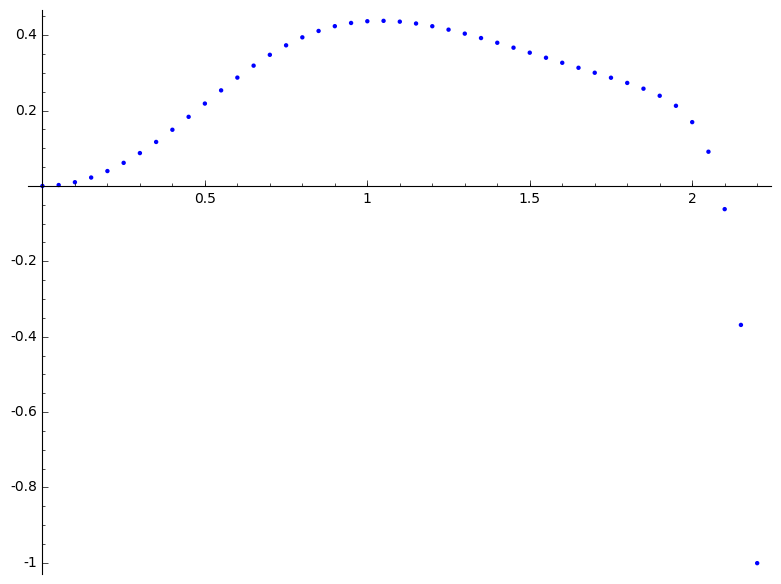

In [138]:
E = -64
step_size = 0.05
xs = [0.]
ys = [matrix.zero(2)]
dys = [matrix.identity(2)]
scaling = [1]

x = 0
while x < 2.2:
    x += step_size
    (y, dy), _ = scs.propagate(E, (ys[-1], dys[-1]), xs[-1], x)
    
    f = matrix(y).norm()
    scaling.append(scaling[-1]*f)
    xs.append(x)
    ys.append(y/f)
    dys.append(dy/f)

list_plot(zip(xs, map(det, map(matrix, [y*s for s, y in zip(scaling, ys)]))))

In [131]:
m.rows()

[(4297983.614299161, -4297983.614299334),
 (-4297983.614299348, 4297983.614299171)]

In [126]:
dy

array([[ 5.49212455, -5.49212455],
       [-5.49212455,  5.49212455]])